<div class="alert alert-block alert-info">
Singapore Management University<br>
CS105 Statistical Thinking for Data Science, 2023/24 Term 2
</div>

# CS105 Group Project Submission (Part I)

-----
Provide your team details, including section, team number, team members, and the name of the dataset. 
Complete all of the following sections. For any part requiring code to derive your answers, please create a code cell immediately below your response and run the code.
To edit any markdown cell, double click the cell; after editing, execute the markdown cell to collapse it.
<br>
-----

## Declaration

<span style="color:red">By submitting this notebook, we declare that **no part of this submission is generated by any AI tool**. We understand that AI-generated submissions will be considered as plagiarism, and just like other plagirisum cases, disciplinary actions will be imposed.</span>

#### Section: G4
#### Team: 6
#### Members:
1. Siew Yu
2. Andrea
3. Jia Kai
4. Doris
5. Xu Duo

#### Dataset: Housing

## Part I: Exploratory Data Analysis (EDA) [8% of final grade]

### 1. Overview of dataset [15% of Part I]

**a.** Summarise the background of the dataset [limited to 50 words]

We use the `read_csv` method in `pandas` to load the data into a `DataFrame`. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('housing.csv')

We take a quick peek by sampling randomly a few rows of data

In [3]:
df.sample(5)

,ID,Crime_Rate,Residential_Area,Non_Retail,River,Pollutants,Rooms,Old_Housing,Distance_Office,Highway_Access,Tax_Rate,Student_Teacher_Ratio,Low_Income,Price
103,104,Low,Very Low,8.56,Far,0.520,6.137,87.4,2.7147,Moderate,384,20.9,13.44,19.3
262,263,Low,Low,3.97,Far,0.647,8.398,91.5,2.2885,Moderate,264,13.0,5.91,48.8
59,60,Low,Low,5.13,Far,0.453,5.927,47.2,6.9320,Moderate,284,19.7,9.22,19.6
313,314,Low,Very Low,9.90,Far,0.544,6.266,82.8,3.2628,Moderate,304,18.4,7.90,21.6
321,322,Low,Very Low,7.38,Far,0.493,6.376,54.3,4.5404,Moderate,287,19.6,6.87,23.1


We get the five-number summary statistics using `.describe`.

In [4]:
df.describe()

,ID,Non_Retail,Pollutants,Rooms,Old_Housing,Distance_Office,Tax_Rate,Student_Teacher_Ratio,Low_Income,Price
count,506.000000,506.000000,506.000000,476.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,11.136779,0.554695,6.278624,69.124506,3.795262,408.237154,18.452174,12.653063,22.532806
std,146.213884,6.860353,0.115878,0.689784,28.346261,2.105850,168.537116,2.165144,7.141062,9.197104
min,1.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,1.730000,5.000000
25%,127.250000,5.190000,0.449000,5.879750,45.175000,2.100175,279.000000,17.325000,6.950000,17.025000
50%,253.500000,9.690000,0.538000,6.205000,78.500000,3.207450,330.000000,19.100000,11.360000,21.200000
75%,379.750000,18.100000,0.624000,6.616500,94.500000,5.188425,666.000000,20.200000,16.955000,25.000000
max,506.000000,27.740000,0.871000,8.780000,105.000000,12.126500,711.000000,22.000000,37.970000,50.000000


**b.** State the size of the dataset

To get size of dataset, use `shape` attribute of `Dataframe`

In [5]:
n_rows, n_cols = df.shape
print(f"# of rows: {n_rows}")
print(f"# of columns: {n_cols}")

# of rows: 506
# of columns: 14


**c.** For each variable, describe what it represents and its data type (numerical or categorical)

**Response.**

In [6]:
print(df.dtypes)

ID                         int64
Crime_Rate                object
Residential_Area          object
Non_Retail               float64
River                     object
Pollutants               float64
Rooms                    float64
Old_Housing              float64
Distance_Office          float64
Highway_Access            object
Tax_Rate                   int64
Student_Teacher_Ratio    float64
Low_Income               float64
Price                    float64
dtype: object


|Name|Description|Category|Details|
|:---|:---|:---|:---|
|ID| Identification number | Categorical | |
|Crime_Rate| Crime rate per capita | Categorical | “High”, “Moderate”, “Low” |
|Residential_Area| Percentage of residential area greater than 25000 square feet | Categorical | “Very High”, “High”, “Moderate”, “Low”, “Very Low” |
|Non_Retail| Percentage of business areas used for non-retail | Numerical | |
|River| Near bridge | Categorical | “Near”,“Far” |
|Pollutants| Concentration of pollutants (parts per 10 million)  | Numerical | |
|Rooms| Number of rooms per unit | Numerical | |
|Old housing| Percentage of units built before the second world war | Numerical | |
|Distance_Office| Weighted distances to major office areas | Numerical | |
|Highway_Access| Accessibility to major highwayse | Categorical | “High”, “Moderate”, “Low” |
|Tax_Rate| Property tax rate per 10,000 dollars | Numerical | |
|Student_Teacher_Ratio| Student to teacher ratio | Numerical | |
|Low_income| Percentage of low income households | Numerical | |
|Price| Median price of homes (in 1000 dollars) | Numerical | |

### 2. Data pre-processing [35% of Part I]

**a.** For each variable, determine the percentage of missing data. For any column with missing data, describe how you resolve the issue. Clearly state any assumption you made.

In [7]:
df.count() / n_rows

ID                       1.000000
Crime_Rate               1.000000
Residential_Area         0.944664
Non_Retail               1.000000
River                    1.000000
Pollutants               1.000000
Rooms                    0.940711
Old_Housing              1.000000
Distance_Office          1.000000
Highway_Access           1.000000
Tax_Rate                 1.000000
Student_Teacher_Ratio    1.000000
Low_Income               1.000000
Price                    1.000000
dtype: float64

For Residential_Area, we impute the missing data using mode. We chose to use mode because of the small number of unique values for Residential_Area. We are assuming that for housing regions with missing Residential_Area, they have the most common value for Residential_Area.

In [8]:
residential_area_mode = df.Residential_Area.mode()[0]
df.Residential_Area.value_counts()

Residential_Area
Very Low     362
Low           62
Very High     27
Moderate      18
High           9
Name: count, dtype: int64

Now we fill in missing values using the computed mode.

In [9]:
df.Residential_Area.fillna(residential_area_mode, inplace=True)
df.count()

ID                       506
Crime_Rate               506
Residential_Area         506
Non_Retail               506
River                    506
Pollutants               506
Rooms                    476
Old_Housing              506
Distance_Office          506
Highway_Access           506
Tax_Rate                 506
Student_Teacher_Ratio    506
Low_Income               506
Price                    506
dtype: int64

For Rooms, we impute the missing data using median. We chose to use median because the large number of unique values for Rooms make mode unsuitable and mean is sensitive to outliers. We are assuming that for housing regions with missing Rooms, they have the middle value in the dataset for Rooms.

In [10]:
rooms_median = df.Rooms.median()
print(f"rooms_median: {rooms_median}")

rooms_median: 6.205


Now we fill in missing values using the computed median.

In [11]:
df.Rooms.fillna(rooms_median, inplace=True)
df.count()

ID                       506
Crime_Rate               506
Residential_Area         506
Non_Retail               506
River                    506
Pollutants               506
Rooms                    506
Old_Housing              506
Distance_Office          506
Highway_Access           506
Tax_Rate                 506
Student_Teacher_Ratio    506
Low_Income               506
Price                    506
dtype: int64

**b.** For each variable, identify outliers (if any) and describe how you resolve the issue. Clearly state any assumption you made.

We use a boxplot to indicate outliers, which we define as values larger than (upper quartile + 1.5  ×  IQR) or values smaller than (lower quartile - 1.5  ×  IQR)

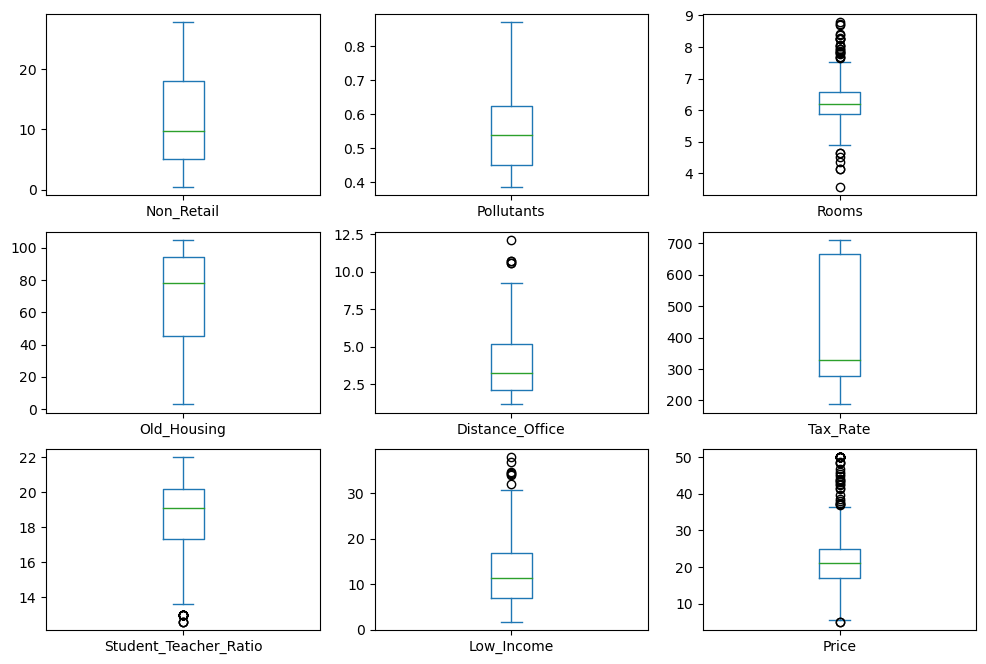

In [12]:
df_numerics = df[["Non_Retail","Pollutants","Rooms","Old_Housing","Distance_Office","Tax_Rate","Student_Teacher_Ratio","Low_Income","Price"]]
df_numerics.plot(kind='box',  subplots=True, layout=(3,3), figsize=(12, 8))
plt.show()

We observe that Non_Retail, Pollutants, Old_Housing and Tax_Rate have no outliers.

For Rooms, we plot the histogram to check the distribution. As there are no sudden deviations from the distribution, we determine that there are no outliers.

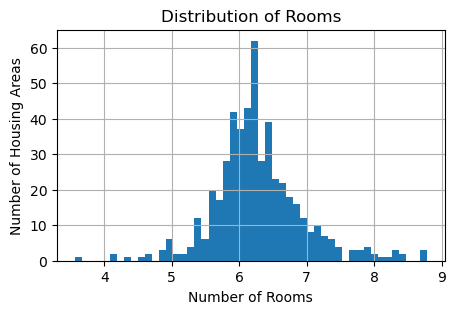

In [13]:
plt.figure(figsize=(5,3))
plt.title("Distribution of Rooms", fontsize=12)
plt.xlabel("Number of Rooms", fontsize=10)
plt.ylabel("Number of Housing Areas", fontsize=10)
df["Rooms"].hist(bins=50)
plt.show()

For Price, we plot the histogram to check the distribution. We determine that there are outliers on the right side which deviates from the distribution.

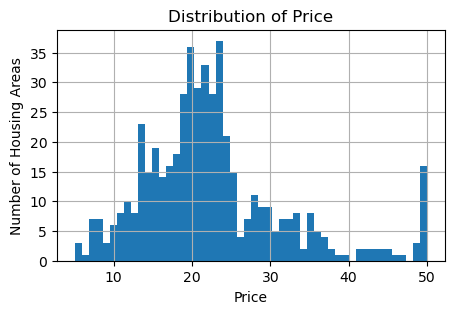

In [14]:
plt.figure(figsize=(5,3))
plt.title("Distribution of Price", fontsize=12)
plt.xlabel("Price", fontsize=10)
plt.ylabel("Number of Housing Areas", fontsize=10)
df["Price"].hist(bins=50)
plt.show()

For Distance_Office, we plot the histogram to check the distribution. As there are no sudden deviations from the distribution, we determine that there are no outliers.

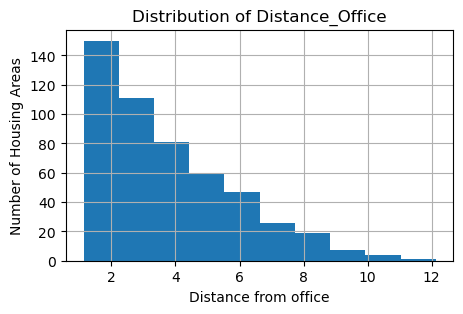

In [15]:
plt.figure(figsize=(5,3))
plt.title("Distribution of Distance_Office", fontsize=12)
plt.xlabel("Distance from office", fontsize=10)
plt.ylabel("Number of Housing Areas", fontsize=10)
df["Distance_Office"].hist(bins=10)
plt.show()

For Student_Teacher_Ratio, we plot the histogram to check the distribution. **??

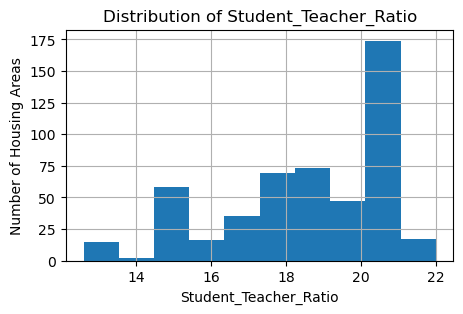

In [16]:
plt.figure(figsize=(5,3))
plt.title("Distribution of Student_Teacher_Ratio", fontsize=12)
plt.xlabel("Student_Teacher_Ratio", fontsize=10)
plt.ylabel("Number of Housing Areas", fontsize=10)
df["Student_Teacher_Ratio"].hist(bins=10)
plt.show()

For Low_Income, we plot the histogram to check the distribution. **??

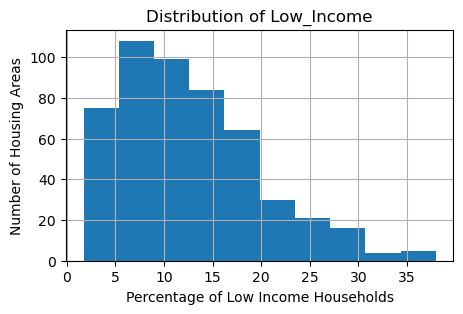

In [17]:
plt.figure(figsize=(5,3))
plt.title("Distribution of Low_Income", fontsize=12)
plt.xlabel("Percentage of Low Income Households", fontsize=10)
plt.ylabel("Number of Housing Areas", fontsize=10)
df["Low_Income"].hist(bins=10)
plt.show()

For Price, we impute the outliers using median.

In [18]:
price_mode = df.mode()
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR

if in upper and price>41, set to mode

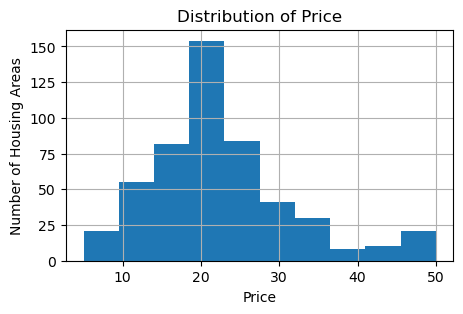

In [19]:
plt.figure(figsize=(5,3))
plt.title("Distribution of Price", fontsize=12)
plt.xlabel("Price", fontsize=10)
plt.ylabel("Number of Housing Areas", fontsize=10)
df["Price"].hist(bins=10)
plt.show()

For Low_Income, we impute the outliers using median. We chose to use median because the large number of unique values for Low_Income make mode unsuitable and mean is sensitive to outliers. We are assuming that for housing regions with missing Low_Income, they have the middle value in the dataset for Low_Income.

**c.** For categorical variables, perform the necessary encoding.

For categorical variables Crime_Rate, Residential_Area, River, Highway_Access, we perform encoding.

For Crime_Rate, Residential_Area, River, Highway_Access, we decided to use ordinal encoding on these values as we believe that assigning a bigger value to High and a smaller value to Low, can provide more context to the data.

River takes the values "Far" and "Near" so we map these values to 1 and 0 respectively.

In [20]:
encoding = {"Far":1, "Near":0}
df["River_Encoded"] = df["River"].map(encoding)

Crime_Rate and Highway_Access takes the values "High", "Moderate" and "Low" so we map these values to 2, 1 and 0 respectively.

In [21]:
encoding = {"High":2, "Moderate":1, "Low":0}
df["Crime_Rate_Encoded"] = df["Crime_Rate"].map(encoding)
df["Highway_Access_Encoded"] = df["Highway_Access"].map(encoding)

Residential_Area takes the values “Very High”, “High”, “Moderate”, “Low” and “Very Low” so we map these values to 4, 3, 2, 1 and 0 respectively.

In [22]:
encoding = {"Very High":4, "High": 3, "Moderate":2, "Low":1, "Very Low":0}
df["Residential_Area_Encoded"] = df["Residential_Area"].map(encoding)

In [23]:
df.drop(columns=["River","Crime_Rate","Highway_Access","Residential_Area"], inplace=True)
df

,ID,Non_Retail,Pollutants,Rooms,Old_Housing,Distance_Office,Tax_Rate,Student_Teacher_Ratio,Low_Income,Price,River_Encoded,Crime_Rate_Encoded,Highway_Access_Encoded,Residential_Area_Encoded
0,1,2.31,0.538,6.575,65.2,4.0900,296,15.3,4.98,24.0,1,0,0,0
1,2,7.07,0.469,6.421,78.9,4.9671,242,17.8,9.14,21.6,1,0,0,0
2,3,7.07,0.469,7.185,61.1,4.9671,242,17.8,4.03,34.7,1,0,0,0
3,4,2.18,0.458,6.998,45.8,6.0622,222,18.7,2.94,33.4,1,0,0,0
4,5,2.18,0.458,7.147,54.2,6.0622,222,18.7,5.33,36.2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,11.93,0.573,6.593,69.1,2.4786,273,21.0,9.67,22.4,1,0,0,0
502,503,11.93,0.573,6.120,76.7,2.2875,273,21.0,9.08,20.6,1,0,0,0
503,504,11.93,0.573,6.976,91.0,2.1675,273,21.0,5.64,23.9,1,0,0,0
504,505,11.93,0.573,6.794,89.3,2.3889,273,21.0,6.48,22.0,1,0,0,0


### 3.	Exploratory analysis and visualization [50% of Part I]

**a.** For each variable, provide relevant summary statistics

We first present the summary of numerical variables in the dataset, followed by categorical variables.

In [24]:
df.iloc[:,2:-3].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pollutants,506.0,0.554695,0.115878,0.3850,0.449000,0.53800,0.624000,0.8710
Rooms,506.0,6.274259,0.669208,3.5610,5.892000,6.20500,6.573000,8.7800
Old_Housing,506.0,69.124506,28.346261,2.9000,45.175000,78.50000,94.500000,105.0000
Distance_Office,506.0,3.795262,2.105850,1.1296,2.100175,3.20745,5.188425,12.1265
Tax_Rate,506.0,408.237154,168.537116,187.0000,279.000000,330.00000,666.000000,711.0000
Student_Teacher_Ratio,506.0,18.452174,2.165144,12.6000,17.325000,19.10000,20.200000,22.0000
Low_Income,506.0,12.653063,7.141062,1.7300,6.950000,11.36000,16.955000,37.9700
Price,506.0,22.532806,9.197104,5.0000,17.025000,21.20000,25.000000,50.0000
River_Encoded,506.0,0.932806,0.250605,0.0000,1.000000,1.00000,1.000000,1.0000


In [25]:
df['River_Encoded'].value_counts()

River_Encoded
1    472
0     34
Name: count, dtype: int64

In [26]:
df['Crime_Rate_Encoded'].value_counts()

Crime_Rate_Encoded
0    385
1    103
2     18
Name: count, dtype: int64

In [27]:
df['Highway_Access_Encoded'].value_counts()

Highway_Access_Encoded
1    292
2    132
0     82
Name: count, dtype: int64

In [28]:
df['Residential_Area_Encoded'].value_counts()

Residential_Area_Encoded
0    390
1     62
4     27
2     18
3      9
Name: count, dtype: int64

**b.** For each variable, provide an appropriate visualisation depicting the distribution of its values, and summarize any key observation(s) you made.

We choose to use histograms to easily depict the distribution of the various values. 

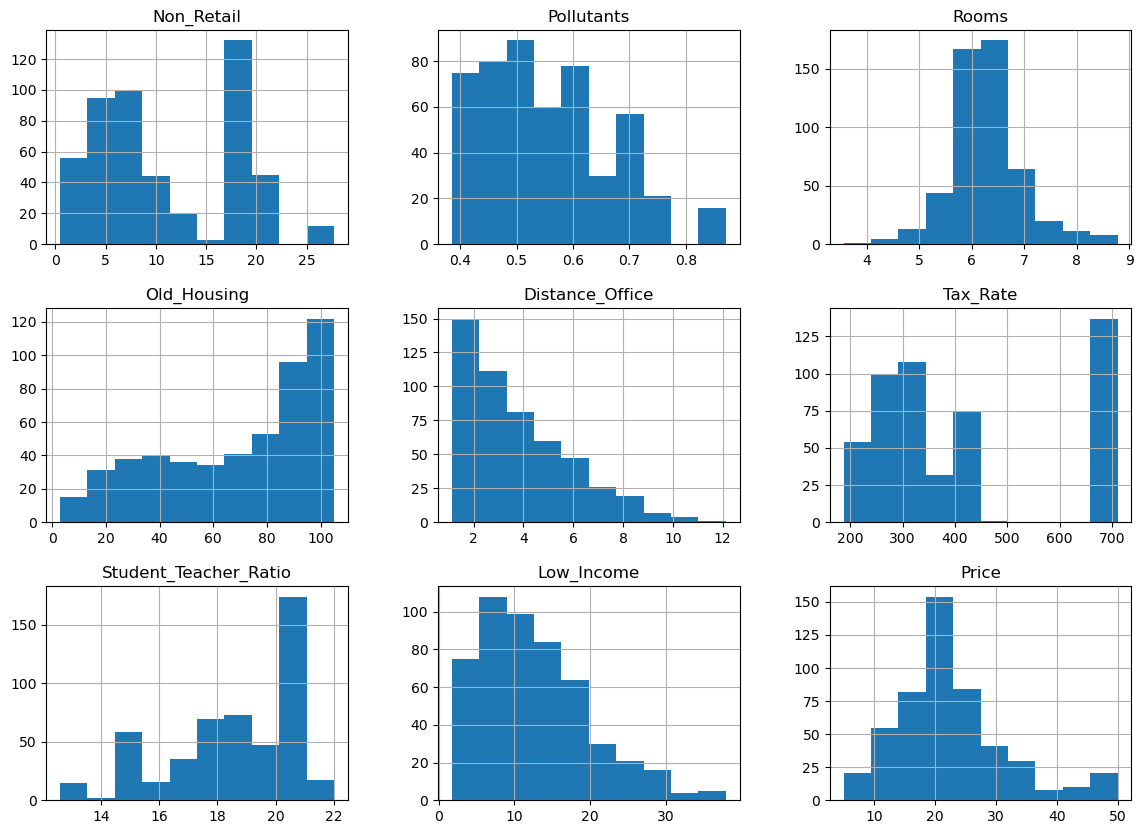

In [29]:
df_numerics = df[["Non_Retail","Pollutants","Rooms","Old_Housing","Distance_Office","Tax_Rate","Student_Teacher_Ratio","Low_Income","Price"]]
df_numerics.hist(layout=(3, 3), figsize=(14, 10))
plt.show()

For Non_Retail, the data follows a binomial distribution.<br>
For Pollutants, the data follows a geometric distribution.<br>
For Rooms, the data follows a normal distribution.<br>
For Old_Housing,the data follows a geometric distribution.<br>
For Distance_Office, the data follows a geometric distribution.<br> 
For Tax_Rate, the data follows a binomial distribution.<br>
For Student_Teacher_Ratio, the data follows a normal distribution.   
For Low_Income, the data follows a geometric distribution.  
For Price, the data follows a normal distribution.

We use piecharts for categorical data.

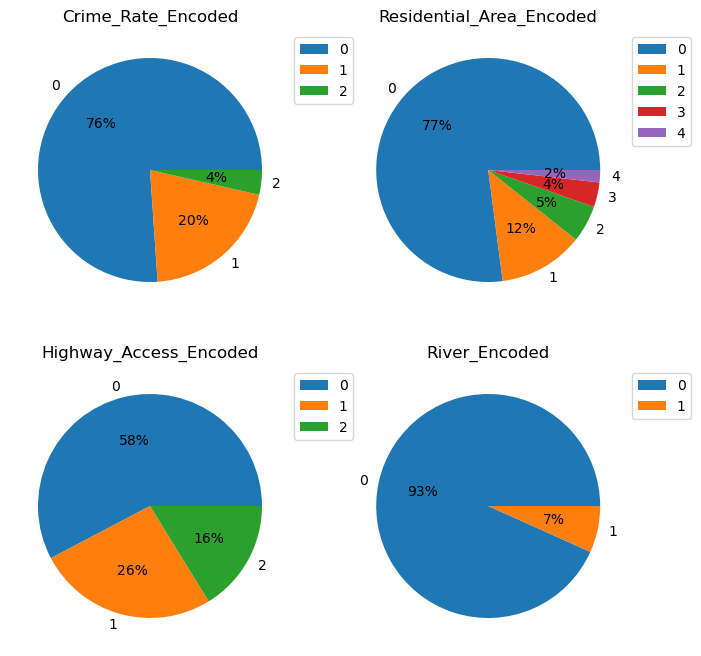

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(8,8))

axs[0][0].pie(df["Crime_Rate_Encoded"].value_counts(), labels = (0 ,1, 2), autopct='%1.0f%%')
axs[0][1].pie(df["Residential_Area_Encoded"].value_counts(), labels = (0, 1, 2, 3, 4), autopct='%1.0f%%')
axs[1][0].pie(df["Highway_Access_Encoded"].value_counts(), labels = (0, 1, 2), autopct='%1.0f%%')
axs[1][1].pie(df["River_Encoded"].value_counts(), labels = (0, 1), autopct='%1.0f%%')

axs[0][0].set_title("Crime_Rate_Encoded")
axs[0][1].set_title("Residential_Area_Encoded")
axs[1][0].set_title("Highway_Access_Encoded")
axs[1][1].set_title("River_Encoded")

axs[0][0].legend(bbox_to_anchor=(1, 0, 0.25, 1))
axs[0][1].legend(bbox_to_anchor=(1, 0, 0.25, 1))
axs[1][0].legend(bbox_to_anchor=(1, 0, 0.25, 1))
axs[1][1].legend(bbox_to_anchor=(1, 0, 0.25, 1))

**c.** Perform bi-variate analysis on the variables. You do not need to present the analysis of every pair of variables; only focus on the pairs you believe are worth investigating and explain. For each pair, describe the relationship between the two variables. Use appropriate statistical methods and/or visualizations.

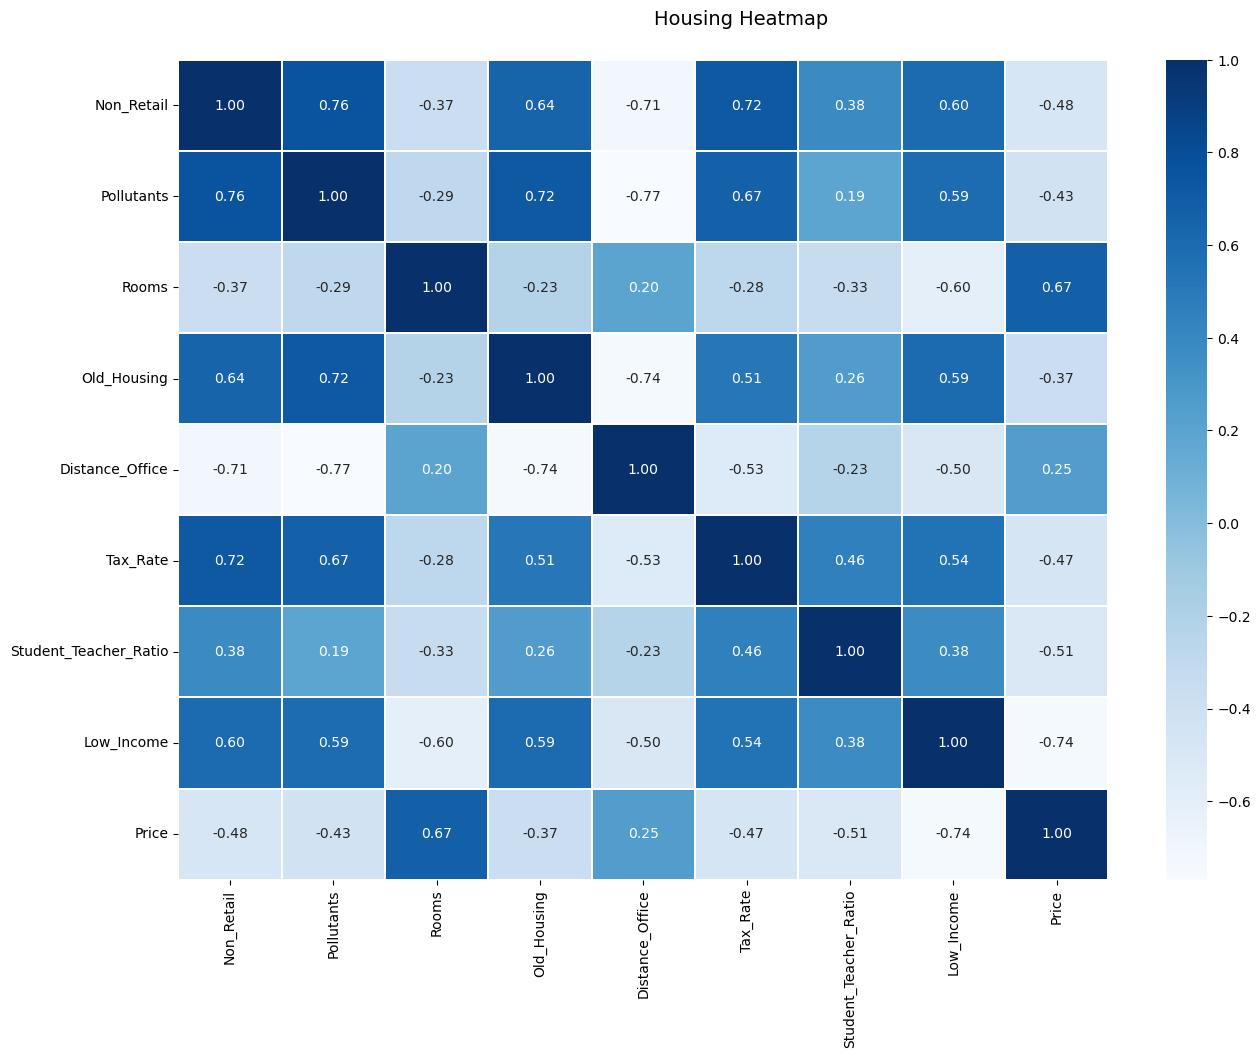

<Figure size 1280x960 with 0 Axes>

In [31]:
f, ax = plt.subplots(figsize=(15, 10))
plt.figure(dpi = 200)

corrMatrix = df[["Non_Retail","Pollutants","Rooms","Old_Housing","Distance_Office","Tax_Rate","Student_Teacher_Ratio","Low_Income","Price"]].corr()
sns.heatmap(corrMatrix, annot=True, ax=ax, cmap="Blues", fmt='.2f', linewidths=.05)

f.subplots_adjust(top=0.93)

t = f.suptitle('Housing Heatmap', fontsize=14)

To find the correlation coefficients for our numerical variables, we made the decision to employ a heatmap. We can identify which bivariate associations are worth looking into by looking at the heatmap, which shows which variables have the greatest or weakest link with one another. Those having significant correlation coefficient magnitudes (>= 0.70) and other relationships that we can draw insights from will be the focus of our investigation.

## Pollutants and Non_Retail

C:\Users\Xenia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


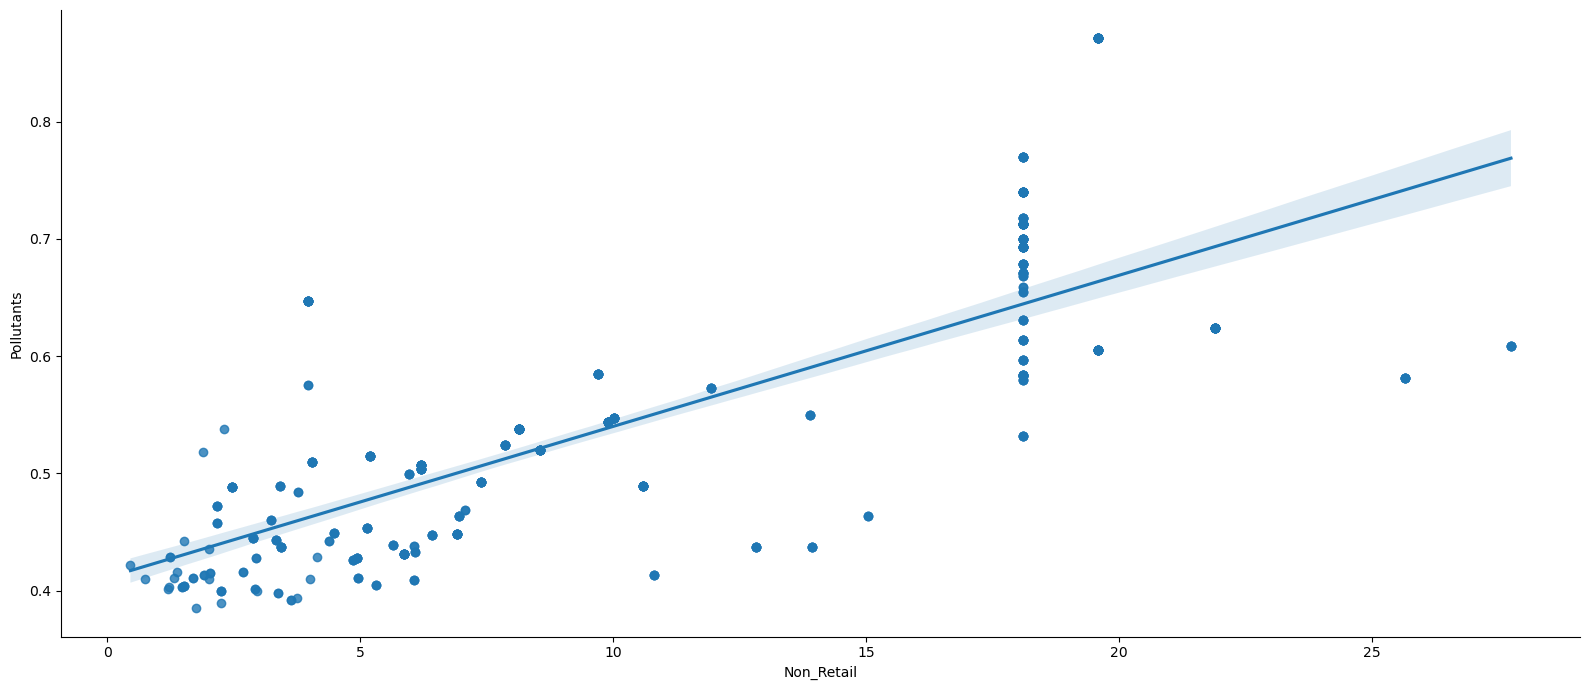

In [32]:
sns.lmplot(data=df, y='Pollutants', x='Non_Retail', height = 7, aspect = 16/7)

The correlation coefficient between Non_Retail and Pollutants is 0.76. As the concentration of pollutants increases, the percentage of business areas used for non-retail also increases. As an area becomes more polluted, more demands need to be met such as healthcare services and pollution control services hence there is a need to increase non-retail businesses in these area.

## Pollutants and Distance_Office

C:\Users\Xenia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


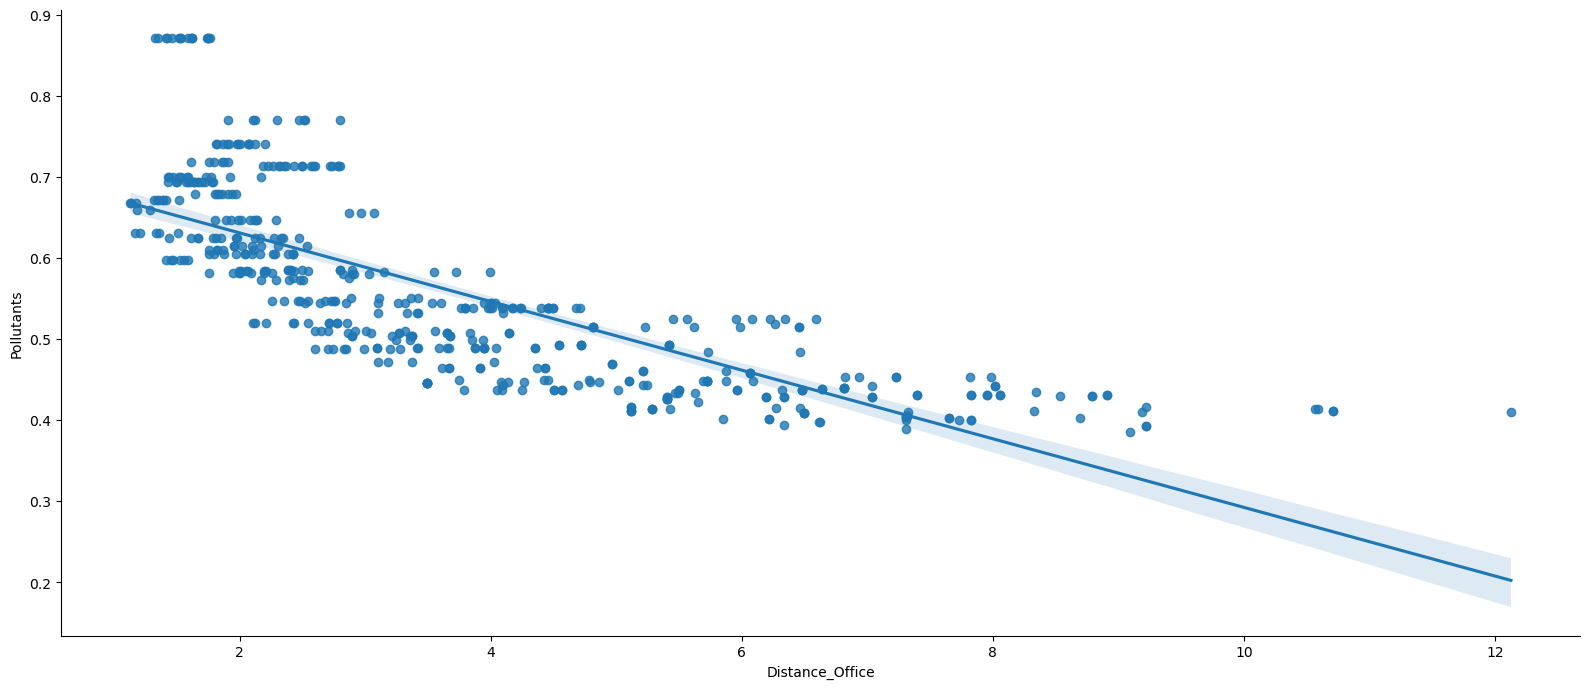

In [33]:
sns.lmplot(data=df, y='Pollutants', x='Distance_Office', height = 7, aspect = 16/7)

The negative correlation coefficient between pollutants and distance_office is -0.77,the relationship between pollutants and distance_office is linear; as the Distance_Office increases, Pollutants decreases. This correlation can be attributed to the fact that offices are relocating farther from areas with pollution sources to ensure a healthier work environment for employees.

## Distance_Office and Non_Retail

C:\Users\Xenia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


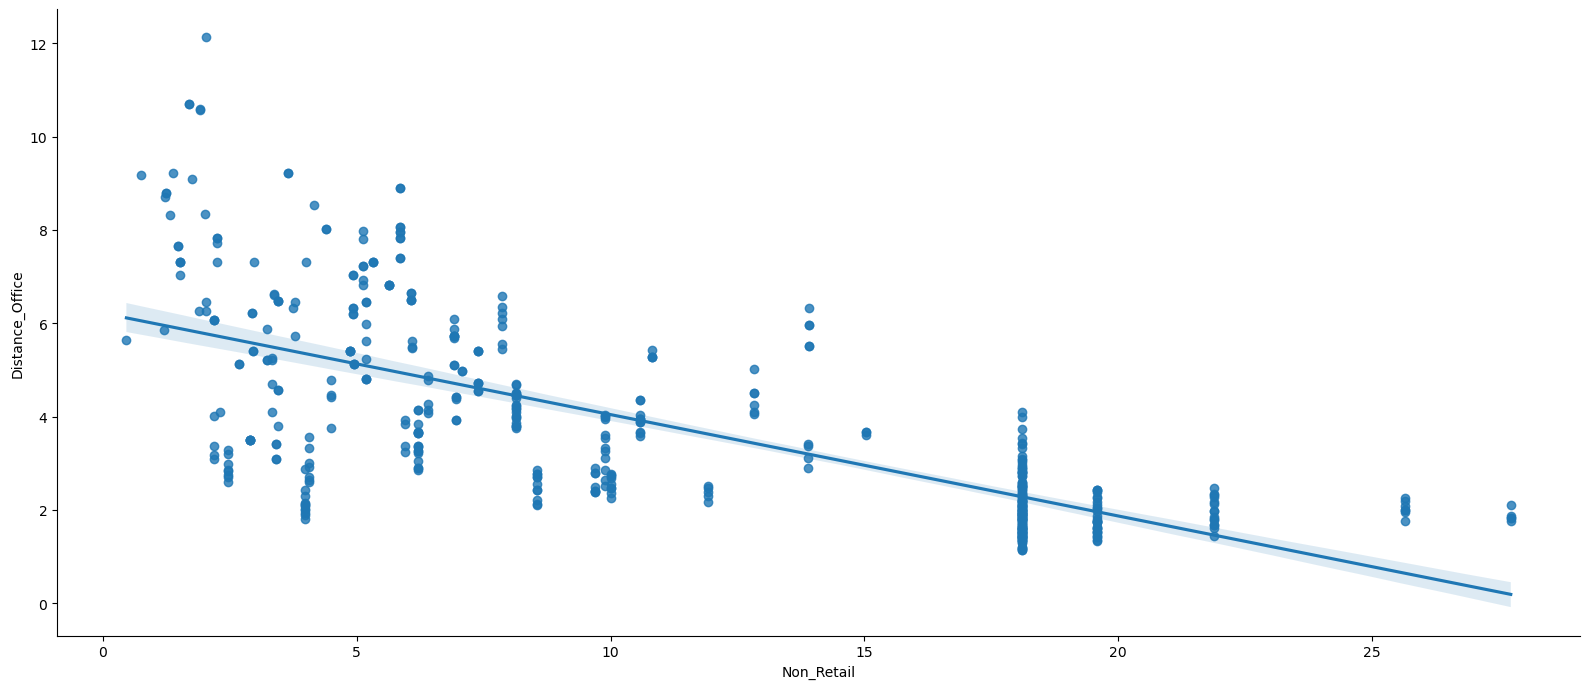

In [34]:
sns.lmplot(data=df, y='Distance_Office', x='Non_Retail', height = 7, aspect = 16/7)

The negative correlation coefficient between Distance_Office and Non-Retail is -0.71. Although the correlation suggests a linear relationship where an increase in Non-Retail corresponds with a decrease in Distance_Office, there may not be a direct connection(meaningful connection) between the two variables. However, since an increase in non-retail will lead to an increase in pollutants, as indicated by the previous graph, it can logically lead to a decrease in distance.



## Pollutants and Old_Housing 

C:\Users\Xenia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


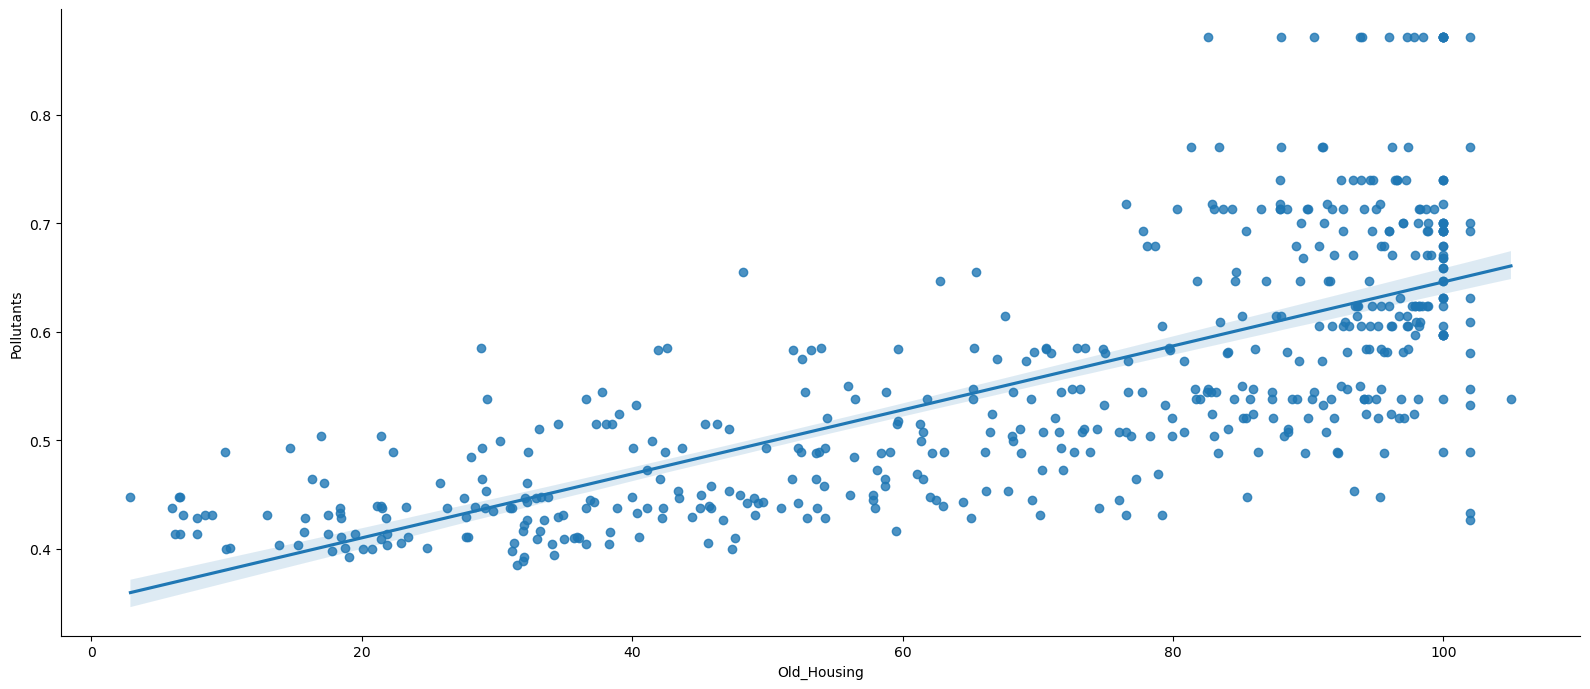

In [35]:
sns.lmplot(data=df, y='Pollutants', x='Old_Housing', height = 7, aspect = 16/7)

The correlation coefficient between Pollutants and Old_Housing is 0.72. The relationship between Pollutants and Old_Housing is linear. Generally, as the percentage of Old_Housing increases, concentration of pollutants increases. The reason could be due to the construction material of old housings. Old housings often lack modern building materials that can mitigate pollutants along with aging infrastructure which can introduce pollutants like lead or chemicals into the atmosphere.

## Low_Income and Price

C:\Users\Xenia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


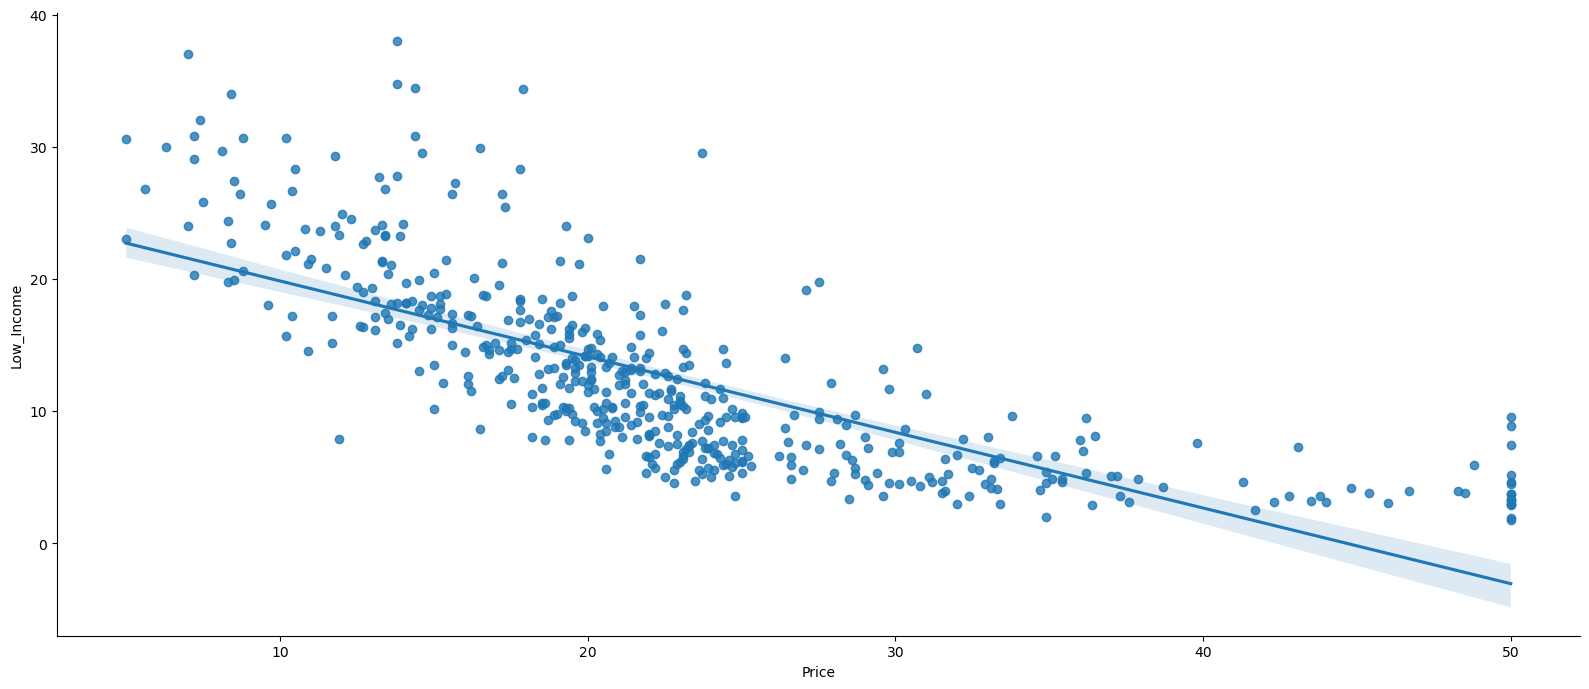

In [36]:
sns.lmplot(data=df, y='Low_Income', x='Price', height = 7, aspect = 16/7)

The correlation coefficient between Price and Low_Income is -0.74. The relationship between Price and Low_Income is linear. Generally, as Price increases, Low_Income decreases. This is because low income households cannot afford to buy expensive houses hence the median prices of homes would decrease.

## Tax_Rate and Non_Retail

C:\Users\Xenia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


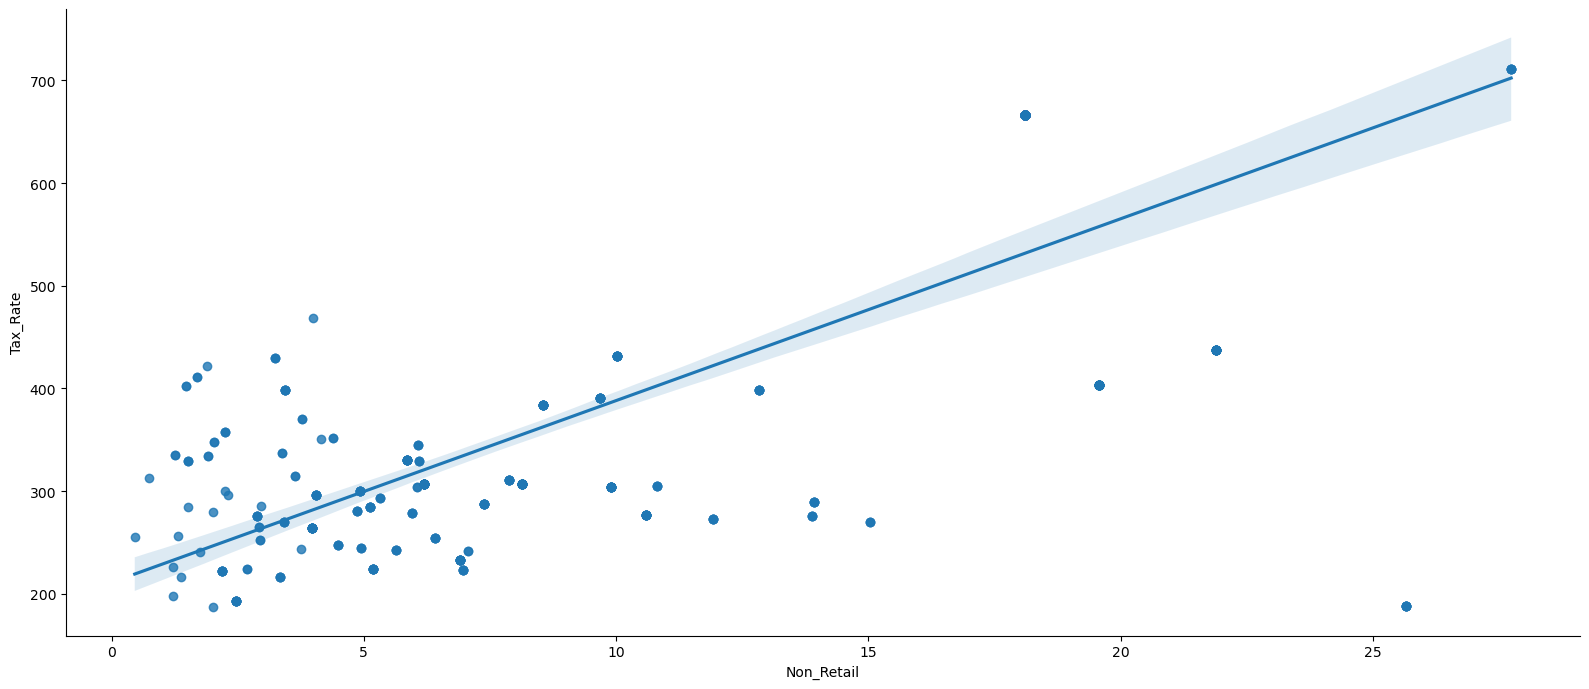

In [37]:
sns.lmplot(data=df, y='Tax_Rate', x='Non_Retail', height = 7, aspect = 16/7)

The correlation coefficient between Tax_Rate and Non_Retail is 0.72. As Non_Retail increases, Tax_rate increases. With more non retail business increase, more infrastructure and services such as such as roads, utilities, etc. would be used hence there would the tax rate would increase.

## Price and Rooms

C:\Users\Xenia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


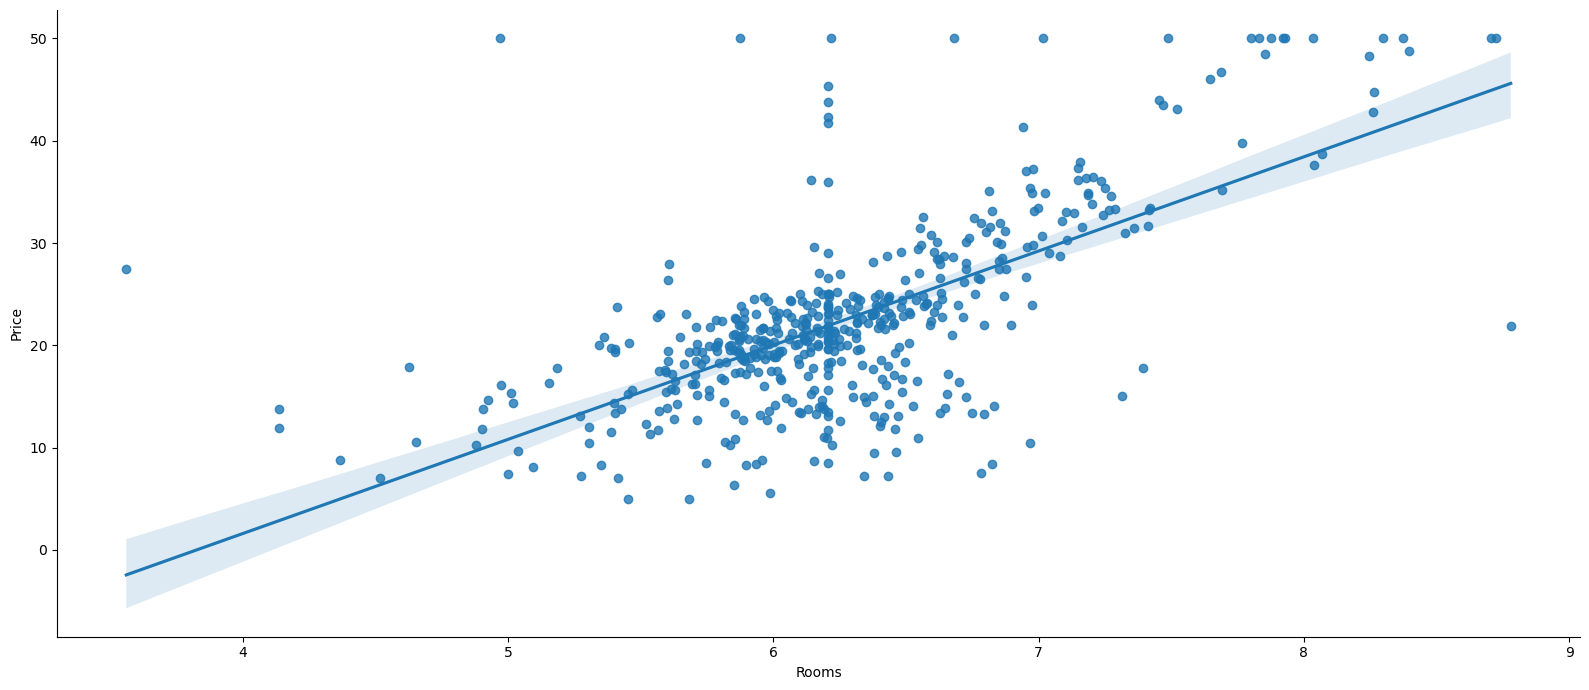

In [38]:
sns.lmplot(data=df, y='Price', x='Rooms', height = 7, aspect = 16/7)

The correlation coefficient between Price and Rooms is 0.67,the relationship between price and the number of rooms is linear; as the number of rooms increases, so does the price. This correlation can be attributed to the fact that an increase in the number of rooms leads to a larger overall area of the house, consequently driving up the price.

## distance_office and old_housing

C:\Users\Xenia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


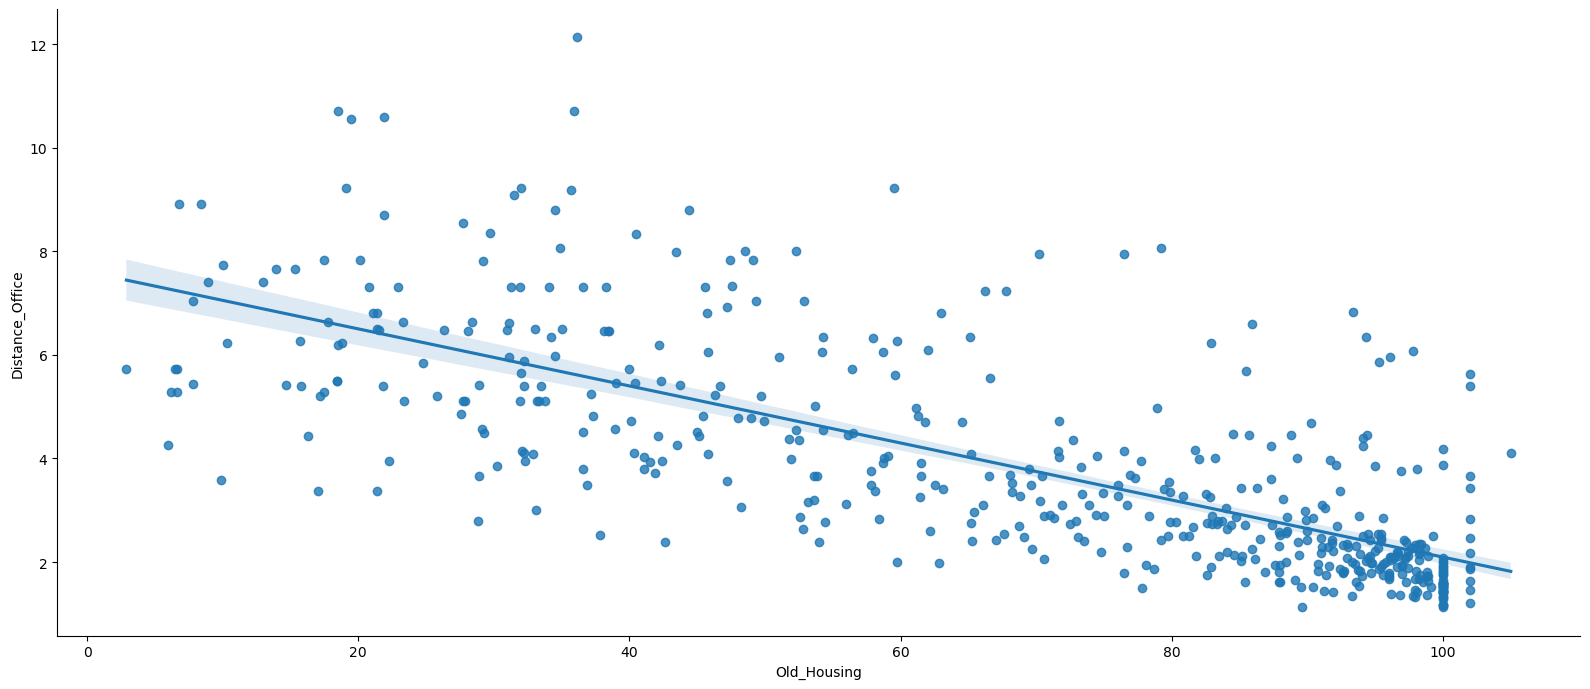

In [39]:
sns.lmplot(data=df, y='Distance_Office', x='Old_Housing', height = 7, aspect = 16/7)

The negative correlation coefficient between distance_office and old_housing is -0.74,the relationship between distance_office and old_housing is linear; as the old_housing increases, distance_office decreases. This correlation can be attributed to the fact that older neighborhoods with buildings from before the Second World War may undergo revitalization efforts, attracting new businesses and residents. This revitalization could result in a decrease in distances to major office areas as these neighborhoods become more desirable and economically vibrant.